In [15]:
import matplotlib
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

In [17]:
data = pd.read_csv(r'C:\Users\Madao\Desktop\Baruch\CIS 9760\Project 03\Final submission\Project03\Athena\results.csv')
print(data)


    company        Date  avg_volatility  max_volatility  min_volatility
0      AMZN  2022-10-24           0.426            1.39            0.13
1      AMZN  2022-10-25           0.324            1.16            0.11
2      AMZN  2022-10-26           0.425            1.23            0.16
3      AMZN  2022-10-27           0.498            1.50            0.13
4      AMZN  2022-10-28           0.588            2.76            0.18
..      ...         ...             ...             ...             ...
105     WMT  2022-11-01           0.239            0.71            0.08
106     WMT  2022-11-02           0.290            1.45            0.08
107     WMT  2022-11-03           0.264            2.18            0.07
108     WMT  2022-11-04           0.294            0.81            0.11
109     WMT  2022-12-16           0.000            0.00            0.00

[110 rows x 5 columns]


In [26]:
data_filter = data[data['avg_volatility'] != 0]
print(data_filter)

    company        Date  avg_volatility  max_volatility  min_volatility
0      AMZN  2022-10-24           0.426            1.39            0.13
1      AMZN  2022-10-25           0.324            1.16            0.11
2      AMZN  2022-10-26           0.425            1.23            0.16
3      AMZN  2022-10-27           0.498            1.50            0.13
4      AMZN  2022-10-28           0.588            2.76            0.18
..      ...         ...             ...             ...             ...
104     WMT  2022-10-31           0.239            0.87            0.07
105     WMT  2022-11-01           0.239            0.71            0.08
106     WMT  2022-11-02           0.290            1.45            0.08
107     WMT  2022-11-03           0.264            2.18            0.07
108     WMT  2022-11-04           0.294            0.81            0.11

[100 rows x 5 columns]


In [28]:
vol_avg = data_filter.groupby(["company"]).mean()
vol_avg_drop = vol_avg.drop(columns=["max_volatility", "min_volatility"])
print(vol_avg_drop)
list(vol_avg)

         avg_volatility
company                
AMZN             0.4485
BABA             0.3573
BBY              0.2273
COST             1.1454
EBAY             0.1283
HD               0.7602
KR               0.0995
SHOP             0.2220
TGT              0.4607
WMT              0.2539


['avg_volatility', 'max_volatility', 'min_volatility']

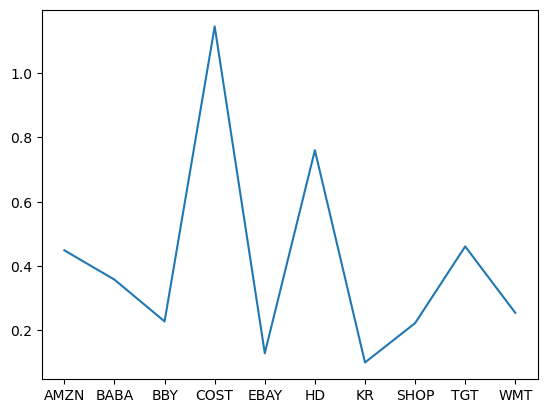

In [29]:
plt.plot(vol_avg_drop)

### Q1 - Based on the graph, COST (Costco) has the most volatile stock price between 10/24 - 11/4

In [30]:
vol_high = data_filter.groupby(["company"], as_index=False, sort=False).mean()
print(vol_high)
list(vol_high)

  company  avg_volatility  max_volatility  min_volatility
0    AMZN          0.4485           1.589           0.146
1    BABA          0.3573           1.725           0.092
2     BBY          0.2273           0.963           0.068
3    COST          1.1454           5.185           0.331
4    EBAY          0.1283           0.498           0.032
5      HD          0.7602           3.292           0.247
6      KR          0.0995           0.377           0.029
7    SHOP          0.2220           0.873           0.063
8     TGT          0.4607           1.814           0.142
9     WMT          0.2539           1.110           0.080


['company', 'avg_volatility', 'max_volatility', 'min_volatility']

<AxesSubplot:xlabel='company'>

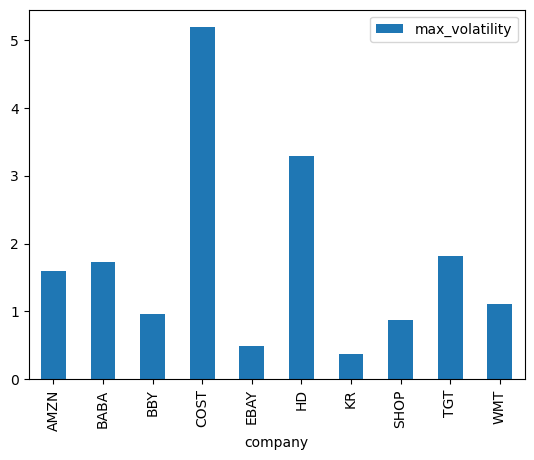

In [31]:
vol_high.plot(x='company',y='max_volatility', kind='bar')

### Q2 - The finding does support the conclusion from the first graph, once again showing COST (Costco) having the most volatile stock price in daily highest

 Hint1: Normalized Average = (Average Volatility – Minimum Volatility) / (Maximum volatility – Minimum Volatility)
 
 Hint2: Calculate the average of Normalized Average per company

### Q3. Normalization allows the comparison of quantities or objects on an appropriate scale. In this case, which company is actually the most volatile?


In [35]:
# Making Normalized Average Volatility column
Normalized_Avg = round((data_filter.avg_volatility - data_filter.min_volatility) / (data_filter.max_volatility - 
                                                                                    data_filter.min_volatility), 3)
data_filter["norm_avg_volatility"] = Normalized_Avg
print(data)

    company        Date  avg_volatility  max_volatility  min_volatility  \
0      AMZN  2022-10-24           0.426            1.39            0.13   
1      AMZN  2022-10-25           0.324            1.16            0.11   
2      AMZN  2022-10-26           0.425            1.23            0.16   
3      AMZN  2022-10-27           0.498            1.50            0.13   
4      AMZN  2022-10-28           0.588            2.76            0.18   
..      ...         ...             ...             ...             ...   
105     WMT  2022-11-01           0.239            0.71            0.08   
106     WMT  2022-11-02           0.290            1.45            0.08   
107     WMT  2022-11-03           0.264            2.18            0.07   
108     WMT  2022-11-04           0.294            0.81            0.11   
109     WMT  2022-12-16           0.000            0.00            0.00   

     norm_avg_volatility  
0                  0.235  
1                  0.204  
2                 

C:\Users\Madao\AppData\Local\Temp\ipykernel_12940\144330231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter["norm_avg_volatility"] = Normalized_Avg


In [36]:
norm_vol = data_filter.groupby(["company"], as_index=False, sort=False).mean()
print(norm_vol)

  company  avg_volatility  max_volatility  min_volatility  norm_avg_volatility
0    AMZN          0.4485           1.589           0.146               0.2256
1    BABA          0.3573           1.725           0.092               0.1814
2     BBY          0.2273           0.963           0.068               0.1877
3    COST          1.1454           5.185           0.331               0.1747
4    EBAY          0.1283           0.498           0.032               0.2158
5      HD          0.7602           3.292           0.247               0.1826
6      KR          0.0995           0.377           0.029               0.2158
7    SHOP          0.2220           0.873           0.063               0.2021
8     TGT          0.4607           1.814           0.142               0.1946
9     WMT          0.2539           1.110           0.080               0.1883


<AxesSubplot:xlabel='company'>

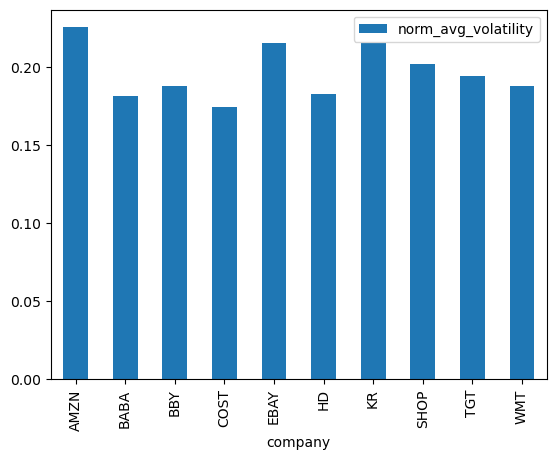

In [37]:
norm_vol.plot(x='company',y='norm_avg_volatility', kind='bar')

### When comparing the Normalized Average volatility, the actual company showing the most volatile trend is Amazon (Amzn)  

## Q4.	Graph the normalized average volatility on October 24th, 2022 (or Any Date) (A Bar Chart: Each bar refers to a company)
Which company is the most volatile on a given day?


In [38]:
norm_date = data_filter[data_filter["Date"] == "2022-10-24"]
print(norm_date)

   company        Date  avg_volatility  max_volatility  min_volatility  \
0     AMZN  2022-10-24           0.426            1.39            0.13   
11    BABA  2022-10-24           0.508            2.00            0.14   
22     BBY  2022-10-24           0.239            1.11            0.07   
33    COST  2022-10-24           1.235            5.76            0.31   
44    EBAY  2022-10-24           0.107            0.46            0.02   
55      HD  2022-10-24           0.743            2.62            0.18   
66      KR  2022-10-24           0.108            0.34            0.02   
77    SHOP  2022-10-24           0.168            0.50            0.05   
88     TGT  2022-10-24           0.452            1.85            0.13   
99     WMT  2022-10-24           0.280            0.92            0.10   

    norm_avg_volatility  
0                 0.235  
11                0.198  
22                0.162  
33                0.170  
44                0.198  
55                0.231  
66 

<AxesSubplot:xlabel='company'>

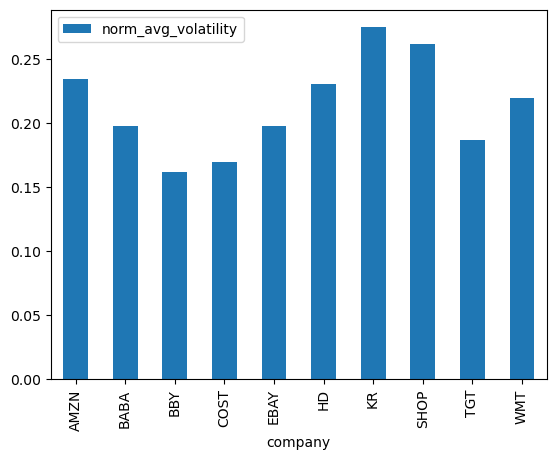

In [39]:
norm_date.plot(x='company',y='norm_avg_volatility', kind='bar')

### on 10/24/2022, Kroger has the most volatile stock price on that day. 